<a href="https://colab.research.google.com/github/ManasMalik99/Exploration-of-Data---Terrorism_excel/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing 
from itertools import product
from sklearn import tree

In [2]:

data = pd.read_csv("Iris.csv")
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.shape

(150, 6)

In [5]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


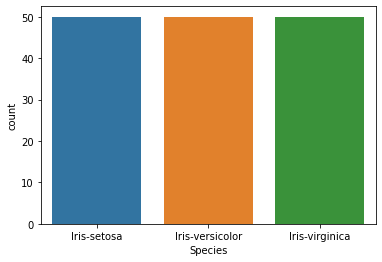

In [7]:

sns.countplot(data['Species'])

In [8]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

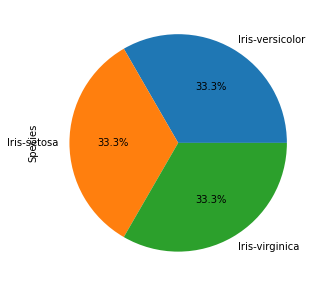

In [9]:
data.Species.value_counts().plot(kind = 'pie',autopct ='%.1f%%',figsize = (5,5))

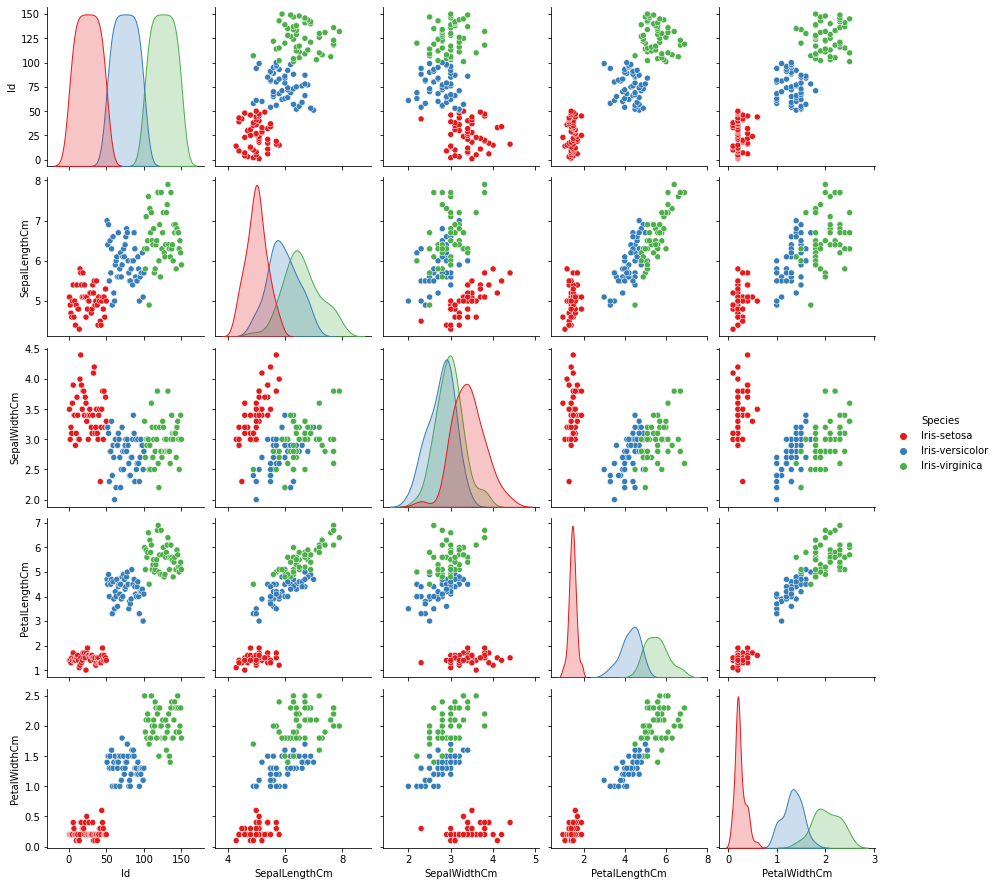

In [10]:

sns.pairplot(data = data,hue = 'Species',palette = 'Set1')

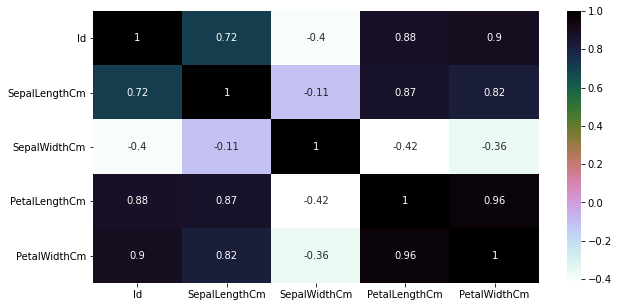

In [11]:
plt.figure(figsize = (10,5))
sns.heatmap(data.corr(),annot = True,cmap = 'cubehelix_r')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
X = data.drop('Species',axis = 1)
y = data['Species']

In [13]:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1)

In [14]:
from sklearn.tree import DecisionTreeClassifier

# Define DecisionTree Model
dtree = DecisionTreeClassifier()

# Capture data from the dataset using .fit
dtree.fit(X_train,y_train)

# Prediction and Model Evaluation
print(X_test)
prediction = dtree.predict(X_test)
prediction

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
22    23            4.6           3.6            1.0           0.2
28    29            5.2           3.4            1.4           0.2
109  110            7.2           3.6            6.1           2.5
114  115            5.8           2.8            5.1           2.4
98    99            5.1           2.5            3.0           1.1
13    14            4.3           3.0            1.1           0.1
135  136            7.7           3.0            6.1           2.3
41    42            4.5           2.3            1.3           0.3
123  124            6.3           2.7            4.9           1.8
23    24            5.1           3.3            1.7           0.5
83    84            6.0           2.7            5.1           1.6
145  146            6.7           3.0            5.2           2.3
60    61            5.0           2.0            3.5           1.0
136  137            6.3           3.4            5.6          

array(['Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica'], dtype=object)

In [15]:

from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,prediction))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         5
Iris-versicolor       1.00      1.00      1.00         3
 Iris-virginica       1.00      1.00      1.00         7

       accuracy                           1.00        15
      macro avg       1.00      1.00      1.00        15
   weighted avg       1.00      1.00      1.00        15



In [16]:
print(confusion_matrix(y_test,prediction))

[[5 0 0]
 [0 3 0]
 [0 0 7]]


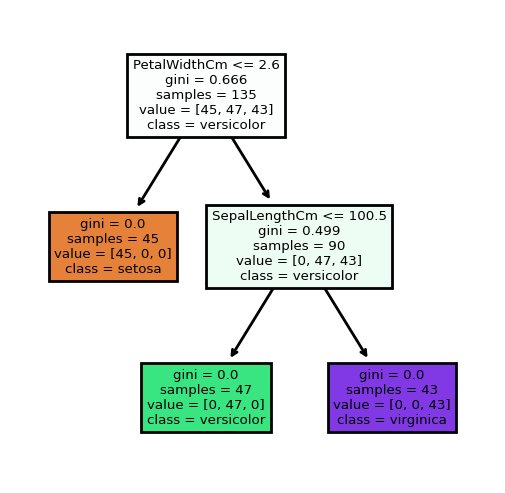

In [17]:
fn = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
cn = ['setosa','versicolor','virginica']
fig , axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3),dpi = 200 )
tree.plot_tree(dtree,feature_names = fn,class_names = cn,filled = True);
fig.savefig('imagename.png')

In [ ]:
data = [float(num) for num in (input('Enter the data in sequence : Sepal.Length Sepal.Width Petal.Length Petal.Width :').strip().split())]
prediction = dtree.predict([data])
prediction